# Plot analytic models of atmosphere : altitude vs Pressure and Rayleigh optical depth vs wavelength at LSST site

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date August 14th 2020
- last update : October 21th 2023
- last update : June 14th 2025 (ZTF and VLT)
- Last update : October 17th 2025 : use getObsAtmo ( v0.2.2)

- Goal : use these analytical models to compare libradtran calculation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline

In [2]:
from getObsAtmo import Dict_Of_sitesAltitudes,Dict_Of_sitesPressures

In [3]:
import sys
sys.path

['/Users/dagoret/miniconda3/envs/conda_py313/lib/python313.zip',
 '/Users/dagoret/miniconda3/envs/conda_py313/lib/python3.13',
 '/Users/dagoret/miniconda3/envs/conda_py313/lib/python3.13/lib-dynload',
 '',
 '/Users/dagoret/miniconda3/envs/conda_py313/lib/python3.13/site-packages',
 '/Users/dagoret/MacOSX/GitHub/LSST/2025/getObsAtmo',
 '/Users/dagoret/MacOSX/GitHub/LSST/2025/rubinsimphot/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/2025/ipyaladin/src']

In [4]:
from atmanalyticalmodels import libatmscattering as atm

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [6]:
NWL=100

In [7]:
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NWL)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NWL), alpha=1)

In [8]:
lsst_altitude = 2.663 #km
lsst_pressure = 743.0 # hPa

# Pressure

In [9]:
h=np.linspace(0,10000.,100)
P=atm.Pressure_adiabatic(h)/atm.P0

Text(0.5, 1.0, 'Altitude - Pressure relation at LSST site')

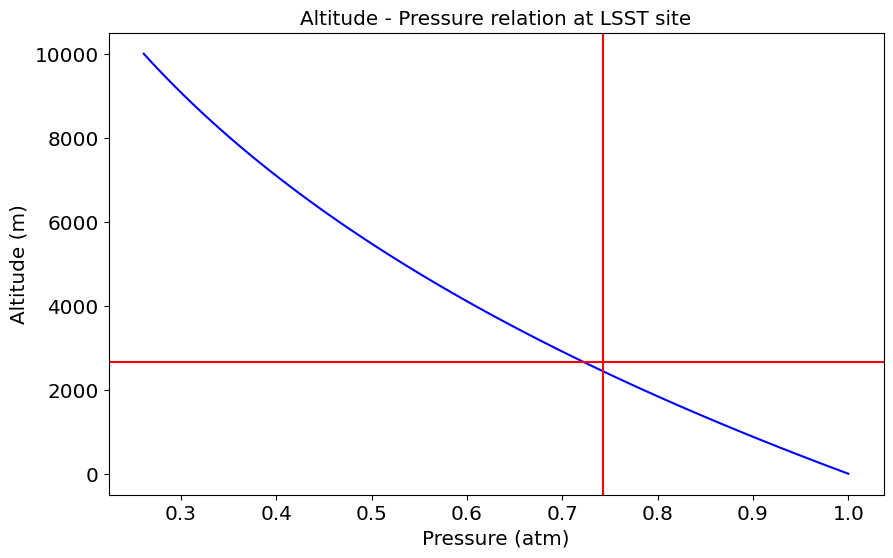

In [10]:
ax = plt.subplot(111)
ax.plot(P,h,'b-')
ax.axhline(lsst_altitude*1000,color="r")
ax.axvline(lsst_pressure/1000,color="r")
ax.set_xlabel("Pressure (atm)")
ax.set_ylabel("Altitude (m)")
ax.set_title("Altitude - Pressure relation at LSST site")

## Rayleigh scattering optical depth

In [11]:
wavelength=np.arange(350,1100)
OD=atm.RayOptDepth_adiabatic(wavelength, altitude=atm.altitude0, costh=1)

Text(0.5, 1.0, 'Rayleigh Optical depth vs wavelength at LSST site')

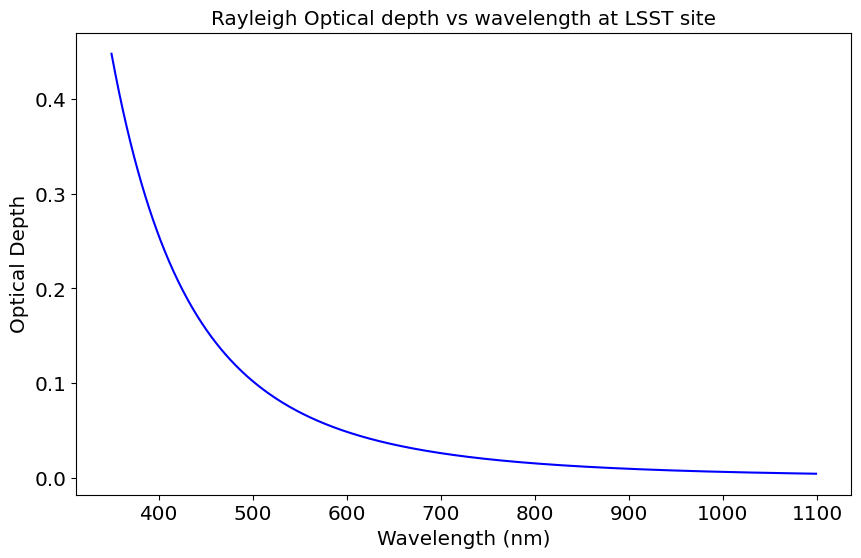

In [12]:
ax = plt.subplot(111)
ax.plot(wavelength,OD,'b-')
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Optical Depth")
ax.set_title("Rayleigh Optical depth vs wavelength at LSST site")